## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [0]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler


In [0]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

# Store the number of users for further usages.
numUsers = np.size(X,0)
# Store the number of movies for further usages.
numMovies = np.size(X,1)


###**1. Understand the data by plotting in 3D space**

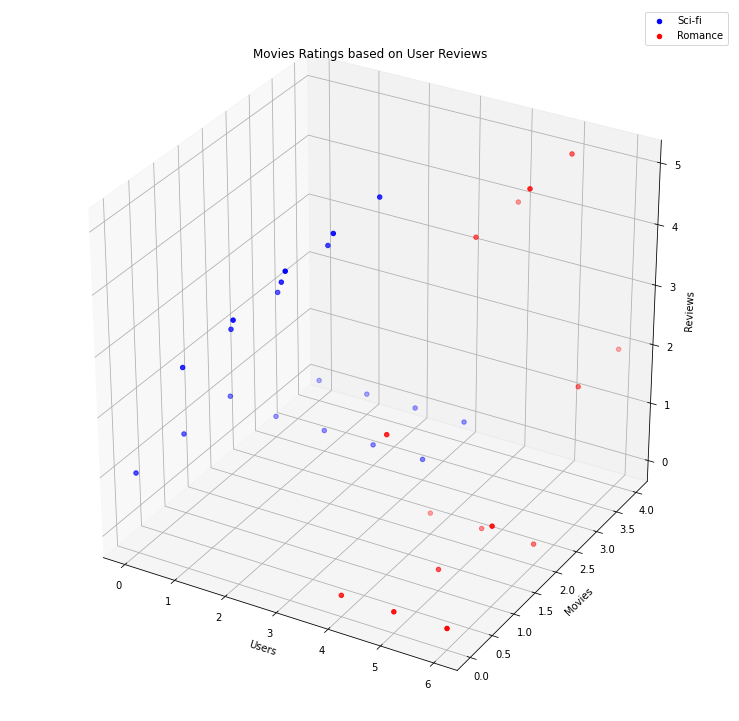

In [5]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.

users = []
movies = []
reviews = []
user_counter = 0 
for user in X: 
  movie_counter = 0
  for review in user:
    users.append(user_counter)
    movies.append(movie_counter)
    reviews.append(review)
    movie_counter+=1
  user_counter+=1


# 2. Set the figure size to (13,13) by using the function plt.figure().
fig = plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.
ax = fig.add_subplot(111, projection='3d')

# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.
plt.rcParams['legend.fontsize'] = 10

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.
ax.scatter(users[:20],movies[:20],reviews[:20],label="Sci-fi",color="b")

# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.
ax.scatter(users[20:],movies[20:],reviews[20:],label="Romance",color="r")
# 7. Set the legend to a proper position using ax.legend(loc=?)
ax.legend(loc=0)

# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
ax.set_zlabel('Reviews')

# 9. Set the title of this fig using plt.title()
plt.title("Movies Ratings based on User Reviews")
# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()
# ax.set_xticklabels([0,1,2,3,4,5,6,7])
# ax.set_yticklabels([1,2,3,4,5])
# 11. plot and present the fig using plt.show()
plt.show()


###**2. Preprocessing step: centering the dataset**

In [0]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
# 2. Subtract the mean from the data set
# 3. Store the new centered data set
# X_centered = X - mean
X_centered = StandardScaler().fit_transform(X)

## **3.Solution 1: Implementing PCA using Singular Value Decomposition (SVD)**

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [0]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values

u,s,vT = np.linalg.svd(X_centered)

In [8]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[-0.011 -0.698 -0.127 -0.693  0.059 -0.102  0.049]
 [ 0.259 -0.154 -0.074  0.012 -0.238  0.92   0.041]
 [ 0.394  0.118 -0.047 -0.061 -0.409 -0.234  0.777]
 [ 0.529  0.39  -0.021 -0.354  0.659  0.089  0.017]
 [-0.368  0.328  0.677 -0.48  -0.161  0.173  0.108]
 [-0.544  0.336 -0.67  -0.205  0.077  0.167  0.259]
 [-0.257 -0.321  0.262  0.343  0.554  0.153  0.56 ]]

S =
[5.467 2.132 0.751 0.    0.   ]

V.T =
[[ 0.465  0.438  0.465 -0.433 -0.433]
 [ 0.303  0.451  0.303  0.554  0.554]
 [-0.438  0.778 -0.438 -0.077 -0.077]
 [ 0.707 -0.    -0.707 -0.    -0.   ]
 [ 0.     0.    -0.    -0.707  0.707]]



### **4: Plot the eigenvalues and choose a K**
Based on the graph below, the ideal K will be 2 as it preserves most of the information of the original dataset. 

D =
[29.891  4.546  0.564  0.     0.   ]



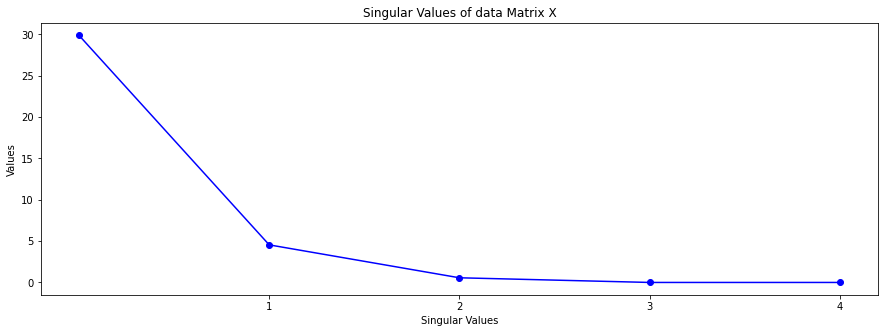

In [9]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
D = s*s
print("D =",np.around(D, decimals=3), sep="\n", end="\n\n")
# 2. Set the fig size to (15,5)
fig = plt.figure(figsize=(15,5))
# 3. Add the line chart using plt.plot( ?? ,'bo-')
plt.plot(D,'bo-')

# 3. Add proper tital, ticks, axis labels
plt.title('Singular Values of data Matrix X')
plt.xlabel('Singular Values')
plt.ylabel('Values')
plt.xticks(ticks=[1,2,3,4])
plt.show()


###**5. Calculate the compressed data with the K you choose from step 4.**

In [10]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
k = 2
# 2. Obtain the first k of v^T and store it
k_vT = vT[:k].T
# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
compressed_X = np.matmul(X,k_vT)
# 4. Print the compressed value of X
print("Compressed X: \n")
print(compressed_X)

Compressed X: 

[[ 1.3688767   1.05671321]
 [ 4.1066301   3.17013963]
 [ 5.47550681  4.22685284]
 [ 6.84438351  5.28356605]
 [-2.58752051  5.33132463]
 [-4.32950699  5.53727266]
 [-1.29376026  2.66566232]]


Let's visualize what just happened.

[1.05671321 3.17013963 4.22685284 5.28356605]
[1.3688767  4.1066301  5.47550681 6.84438351]
[5.33132463 5.53727266 2.66566232]
[-2.58752051 -4.32950699 -1.29376026]


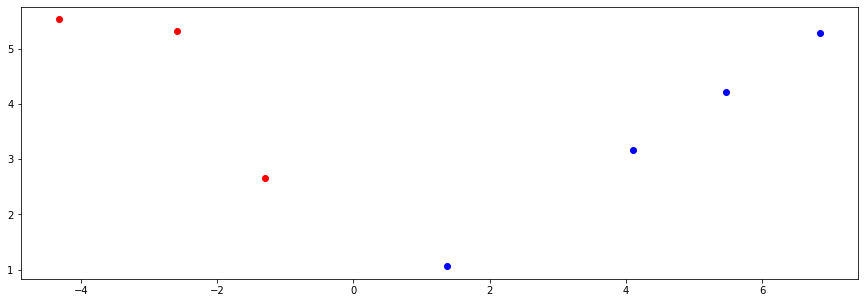

In [11]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
fig = plt.figure(figsize=(15,5))
# 2. Create propor title, axis and legend
class1_x = compressed_X[0:4,1]
print(class1_x)
class1_y = compressed_X[0:4,0]
print(class1_y)
class2_x = compressed_X[4:,1]
print(class2_x)
class2_y = compressed_X[4:,0]
print(class2_y)
plt.scatter(compressed_X[:,0][:4],compressed_X[:,1][:4],c="b")
plt.scatter(compressed_X[:,0][4:],compressed_X[:,1][4:],c="r")
# 3. Plot the data
plt.show()


## **6. Solution2: Directly computing  V and D**

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [0]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.

XTX = np.matmul(X_centered.T,X_centered)
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values 
eigen_values,eigen_vectors = np.linalg.eig(XTX)


## **7. Print the V and D from step 6**

In [13]:
print("V (Eigen-vectors) = ")
print(np.around(eigen_vectors, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigen_values, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigen_values)), decimals=3))

V (Eigen-vectors) = 
[[-0.465 -0.303  0.438 -0.703  0.001]
 [-0.438 -0.451 -0.778 -0.     0.   ]
 [-0.465 -0.303  0.438  0.703 -0.001]
 [ 0.433 -0.554  0.077  0.074 -0.707]
 [ 0.433 -0.554  0.077 -0.074  0.707]]

diagonal elements of D (Eigen-values) = 
[29.891  4.546  0.564  0.     0.   ]

sqrt(Eigen-values) = 
[5.467 2.132 0.751 0.    0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Principal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [0]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people



In [15]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
# 2. Store the number of images and its hight, width using lfw_people.images.shape
# 3. Calculate number of pixels
# 4. Store the pixel values using lfw_people.data
lfw_people = fetch_lfw_people(min_faces_per_person=70)
print(lfw_people.images.shape)
n_images, h, w= lfw_people.images.shape
X = np.array(lfw_people.data)
print(X.shape)
y = lfw_people.target
names = lfw_people.target_names
print("Target Names")
for i in range(names.size):
  print(i,":",names[i])
print("Targets of Data set")
print(y)
print("Data in Data set")
print(X)
print("Number of images in Dataset:",n_images)
print("Height of image:",h)
print("Width of image:",w)

(1288, 62, 47)
(1288, 2914)
Target Names
0 : Ariel Sharon
1 : Colin Powell
2 : Donald Rumsfeld
3 : George W Bush
4 : Gerhard Schroeder
5 : Hugo Chavez
6 : Tony Blair
Targets of Data set
[5 6 3 ... 5 3 5]
Data in Data set
[[253.66667  254.33333  253.66667  ...  87.        88.        86.666664]
 [ 38.333332  43.        53.       ... 114.666664 116.666664 143.66667 ]
 [ 88.        92.666664 112.666664 ... 182.66667  183.66667  182.66667 ]
 ...
 [ 86.333336  83.333336  76.333336 ...  48.        49.        40.666668]
 [ 49.333332  55.666668  76.666664 ... 186.33333  176.33333  161.      ]
 [ 31.        26.333334  28.       ...  34.        42.        69.666664]]
Number of images in Dataset: 1288
Height of image: 62
Width of image: 47


In [0]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

###**1. Load dataset and display the fourth face in the dataset** 

Image Target:  5


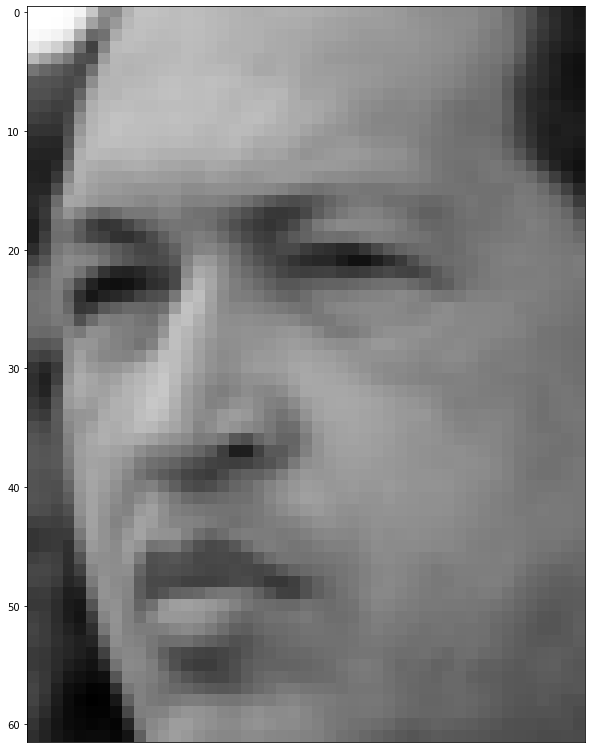

Image Target:  6


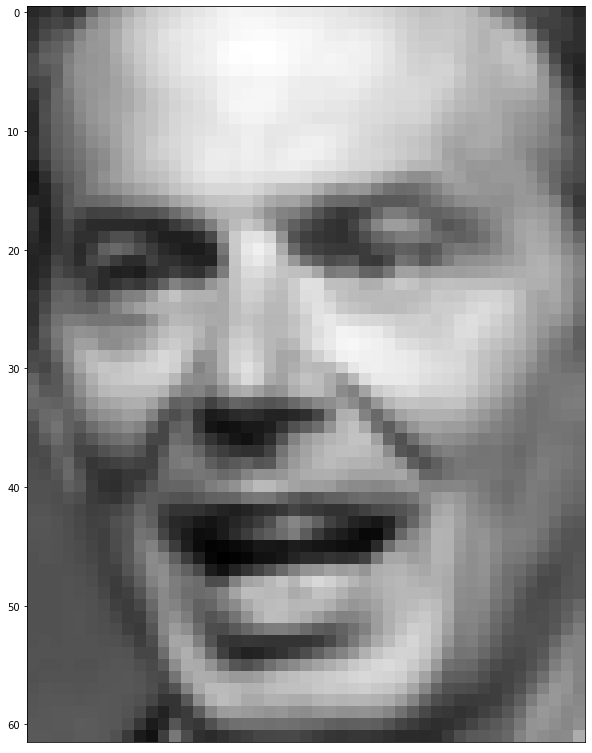

Image Target:  3


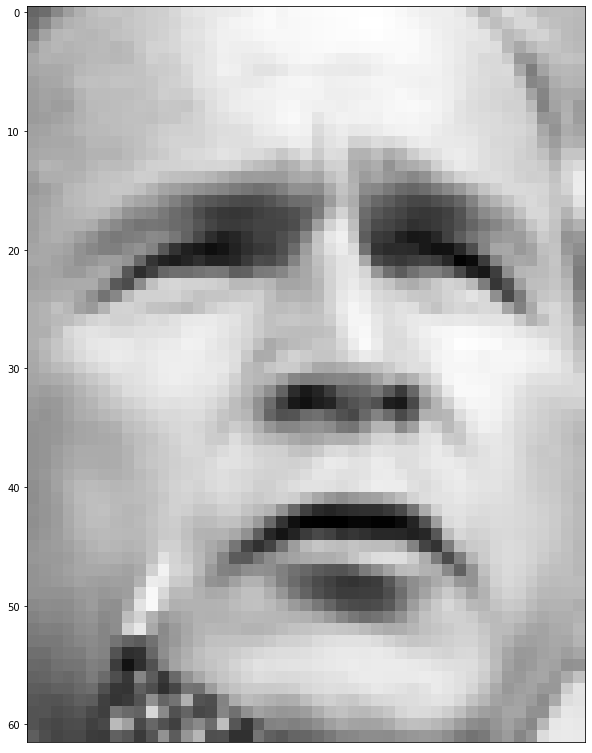

Image Target:  1


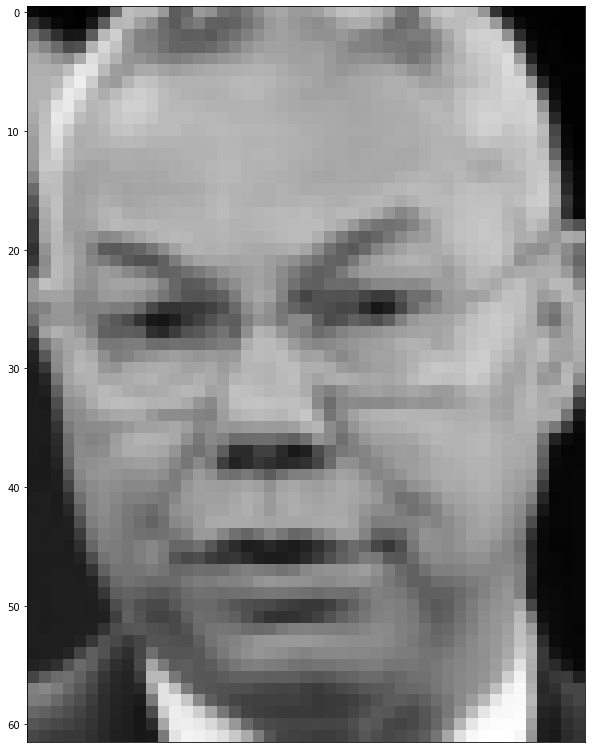

Image Target:  0


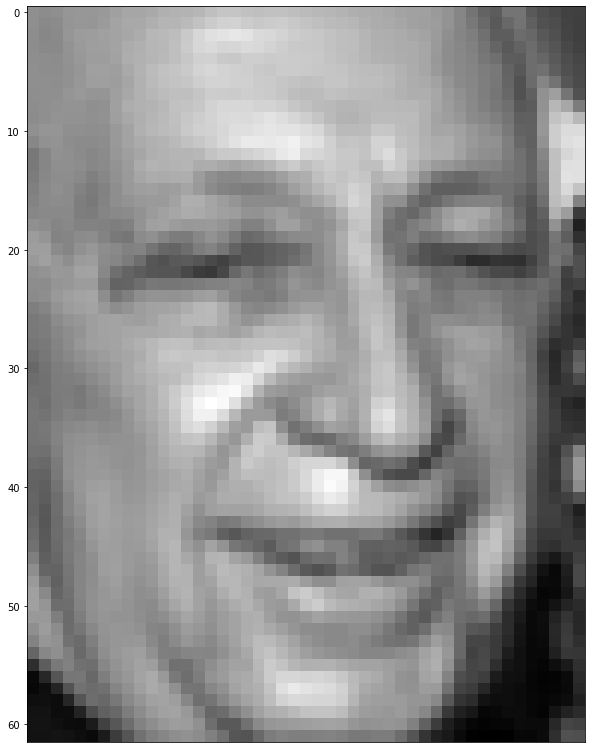

In [17]:

# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)

# 2. Use plt_face()
for i in range(5):
  print("Image Target: ", y[i])
  face_figure = plt.figure(figsize=(10,20))
  plt_face(X[i])
  plt.show()

# 3. plt.show()


### **2-3. Compute the mean of all the examples in the dataset fea. (That is, compute an image such that each pixel i of the image is the mean of pixel i in all the images in X). Display the mean image calculated in step 2**

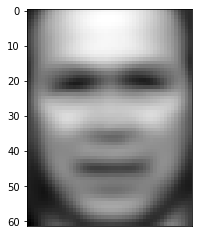

In [18]:
# Find the Mean picture:
# 1. Calculate the mean of the image data

# 2. Remove the mean from all the image
# 3. plot the face use plt_face()
X_mean = np.mean(X,axis = 0)
X_mean = X_mean[np.newaxis,:]
plt_face(X_mean)
X_centered = X - X_mean


## **4.Do dimensionality reduction with either of the pca algorithms you implemented in Task 1. I decided to use Single-Value Decomposition.**

In [0]:
# Find eig vec and eig value using SVD:

u,s,vT = np.linalg.svd(X_centered)

eigval = s*s
eigvec = vT



In [20]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (1288, 1288) (1288,) (2914, 2914)

U =
[[-0.004  0.004 -0.014 ... -0.011  0.002 -0.028]
 [-0.026 -0.022 -0.019 ...  0.02   0.055 -0.028]
 [ 0.019 -0.009  0.024 ... -0.011  0.012 -0.028]
 ...
 [-0.049  0.011  0.007 ...  0.021 -0.012 -0.028]
 [ 0.049 -0.018 -0.021 ... -0.006  0.011 -0.028]
 [-0.015 -0.004 -0.019 ... -0.019  0.002 -0.028]]

S =
[3.1453578e+04 2.8140605e+04 1.9568982e+04 ... 4.0508999e+01 4.0160999e+01
 1.0000000e-01]

V.T =
[[ 0.005  0.006  0.006 ...  0.01   0.009  0.007]
 [ 0.017  0.016  0.016 ... -0.033 -0.033 -0.031]
 [ 0.018  0.016  0.015 ...  0.037  0.033  0.031]
 ...
 [ 0.012  0.015 -0.01  ...  0.258 -0.135  0.041]
 [ 0.025 -0.001 -0.038 ... -0.141  0.254 -0.101]
 [ 0.003  0.045 -0.056 ...  0.038 -0.084  0.139]]



##**5-6. Compute the 5 top principal components of the data matrix fea, and print the.**

In [21]:
print("Top 5 Vector:")
print()
print(eigvec.real.tolist()[:5])
print()
print("Top 5 EigVal:")
print()
print(eigval.real[:5])
print()
# print("Associateed 5 attributes in fourth image")
# print("Indexing by",top5)
# print()
# print(fea[3][top5])

Top 5 Vector:

[[0.005373429507017136, 0.005695135332643986, 0.0061380332335829735, 0.007016506511718035, 0.007956034503877163, 0.008488570339977741, 0.009634105488657951, 0.010693605057895184, 0.011063646525144577, 0.011358117684721947, 0.011695049703121185, 0.012003813870251179, 0.01238980796188116, 0.012511171400547028, 0.012672068551182747, 0.012996151112020016, 0.013428579084575176, 0.013819262385368347, 0.014166598208248615, 0.01435794122517109, 0.014422889798879623, 0.014544841833412647, 0.014796909876167774, 0.015103710815310478, 0.015278461389243603, 0.015481610782444477, 0.01566559635102749, 0.01587795279920101, 0.01625586301088333, 0.016473708674311638, 0.01642843522131443, 0.016194269061088562, 0.015938451513648033, 0.015701204538345337, 0.015397691167891026, 0.015196961350739002, 0.015155778266489506, 0.014610139653086662, 0.013672596774995327, 0.012989149428904057, 0.012503368780016899, 0.01141714584082365, 0.010260507464408875, 0.009400754235684872, 0.008375102654099464,

### **7-8. Project the fourth face in the dataset onto the first 5 principal components.. Project the fourth face with first 5 principal components back into the original image space, and then display it.**

The projection of fourth image, d = 5


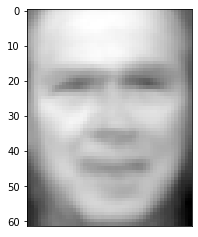

In [22]:
# prjection of fourth face to first 5 principle components
print("The projection of fourth image, d = 5")
top5 = eigvec[:5]
proj_4 = np.matmul(X[4],top5.T)
proj_4 = proj_4[np.newaxis,:]
new_X4_5 = np.dot(proj_4,top5)+ X_mean
plt_face(new_X4_5)

### **9. Repeat step 5-8 with the first 50 principle components (instead of 5).**

The projection of 4 image, d=50


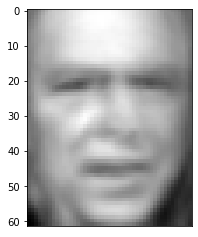

In [23]:
print("The projection of 4 image, d=50")
top50 = eigvec[:50]
proj_50 = np.matmul(X[4],top50.T)
proj_50 = proj_50[np.newaxis,:]
new_X4_50 = np.dot(proj_50,top50)+ X_mean
plt_face(new_X4_50)


Resources

- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- Yi Fang Lecture 6
- https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491
- Linear Algebra Review: https://medium.com/@jonathan_hui/machine-learning-linear-algebra-a5b1658f0151

- https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d
